# 사전작업

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from tensorflow import keras

from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# 실행할 때마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

# 유방암 데이터 (2진분류)

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
# 데이터 불러오기
data = datasets.load_breast_cancer()
# 속성데이터
X = data.data
# 클래스 데이터
y = data.target


In [5]:
df =pd.DataFrame(X,y)
df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [7]:
print(data.data.shape)

(569, 30)


In [8]:
 list(data.target_names)

['malignant', 'benign']

In [9]:
# 모델 설정
model = Sequential([
    Dense(30, input_dim=30, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
]) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,415
Trainable params: 1,415
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 모델 컴파일 
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [12]:
# 모델 실행 및 저장
model.fit(X, y, validation_split=0.33, epochs=2020, batch_size=600, 
          verbose=1, callbacks=[early_stopping_callback])

Train on 381 samples, validate on 188 samples
Epoch 1/2020
381/381 [==============================] - 0s 1ms/sample - loss: 43.5312 - accuracy: 0.5564 - val_loss: 19.9924 - val_accuracy: 0.7713
Epoch 2/2020
381/381 [==============================] - 0s 38us/sample - loss: 34.9755 - accuracy: 0.5564 - val_loss: 14.8066 - val_accuracy: 0.7713
Epoch 3/2020
381/381 [==============================] - 0s 21us/sample - loss: 25.9837 - accuracy: 0.5564 - val_loss: 9.6720 - val_accuracy: 0.7660
Epoch 4/2020
381/381 [==============================] - 0s 18us/sample - loss: 16.9688 - accuracy: 0.5538 - val_loss: 4.9943 - val_accuracy: 0.6383
Epoch 5/2020
381/381 [==============================] - 0s 18us/sample - loss: 8.2749 - accuracy: 0.4593 - val_loss: 4.4546 - val_accuracy: 0.1809
Epoch 6/2020
381/381 [==============================] - 0s 18us/sample - loss: 3.6525 - accuracy: 0.3386 - val_loss: 9.8157 - val_accuracy: 0.2287
Epoch 7/2020
381/381 [==============================] - 0s 21us/sam

Epoch 56/2020
381/381 [==============================] - 0s 16us/sample - loss: 0.4783 - accuracy: 0.8005 - val_loss: 0.7132 - val_accuracy: 0.6702
Epoch 57/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.4151 - accuracy: 0.8320 - val_loss: 0.5668 - val_accuracy: 0.7340
Epoch 58/2020
381/381 [==============================] - 0s 17us/sample - loss: 0.3652 - accuracy: 0.8793 - val_loss: 0.4664 - val_accuracy: 0.8245
Epoch 59/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.3497 - accuracy: 0.8871 - val_loss: 0.4161 - val_accuracy: 0.8511
Epoch 60/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.3598 - accuracy: 0.9055 - val_loss: 0.3941 - val_accuracy: 0.8777
Epoch 61/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.3713 - accuracy: 0.9003 - val_loss: 0.3791 - val_accuracy: 0.8883
Epoch 62/2020
381/381 [==============================] - 0s 22us/sample - loss: 0.3646 - accuracy: 0.9003 - val_

Epoch 112/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1772 - accuracy: 0.9291 - val_loss: 0.1973 - val_accuracy: 0.9202
Epoch 113/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1767 - accuracy: 0.9318 - val_loss: 0.1997 - val_accuracy: 0.9202
Epoch 114/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1764 - accuracy: 0.9344 - val_loss: 0.2007 - val_accuracy: 0.9202
Epoch 115/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1760 - accuracy: 0.9344 - val_loss: 0.1999 - val_accuracy: 0.9202
Epoch 116/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.1755 - accuracy: 0.9344 - val_loss: 0.1978 - val_accuracy: 0.9202
Epoch 117/2020
381/381 [==============================] - 0s 16us/sample - loss: 0.1750 - accuracy: 0.9344 - val_loss: 0.1950 - val_accuracy: 0.9202
Epoch 118/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1745 - accuracy: 0.9344

Epoch 167/2020
381/381 [==============================] - 0s 16us/sample - loss: 0.1624 - accuracy: 0.9318 - val_loss: 0.1941 - val_accuracy: 0.9255
Epoch 168/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1622 - accuracy: 0.9318 - val_loss: 0.1940 - val_accuracy: 0.9309
Epoch 169/2020
381/381 [==============================] - 0s 19us/sample - loss: 0.1619 - accuracy: 0.9318 - val_loss: 0.1938 - val_accuracy: 0.9309
Epoch 170/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.1617 - accuracy: 0.9318 - val_loss: 0.1934 - val_accuracy: 0.9309
Epoch 171/2020
381/381 [==============================] - 0s 16us/sample - loss: 0.1615 - accuracy: 0.9318 - val_loss: 0.1931 - val_accuracy: 0.9309
Epoch 172/2020
381/381 [==============================] - 0s 16us/sample - loss: 0.1613 - accuracy: 0.9318 - val_loss: 0.1929 - val_accuracy: 0.9309
Epoch 173/2020
381/381 [==============================] - 0s 16us/sample - loss: 0.1611 - accuracy: 0.9318

Epoch 222/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1525 - accuracy: 0.9396 - val_loss: 0.1876 - val_accuracy: 0.9309
Epoch 223/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1524 - accuracy: 0.9396 - val_loss: 0.1874 - val_accuracy: 0.9309
Epoch 224/2020
381/381 [==============================] - 0s 16us/sample - loss: 0.1522 - accuracy: 0.9396 - val_loss: 0.1874 - val_accuracy: 0.9309
Epoch 225/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1521 - accuracy: 0.9396 - val_loss: 0.1873 - val_accuracy: 0.9309
Epoch 226/2020
381/381 [==============================] - 0s 16us/sample - loss: 0.1519 - accuracy: 0.9396 - val_loss: 0.1872 - val_accuracy: 0.9309
Epoch 227/2020
381/381 [==============================] - 0s 20us/sample - loss: 0.1518 - accuracy: 0.9396 - val_loss: 0.1871 - val_accuracy: 0.9309
Epoch 228/2020
381/381 [==============================] - 0s 16us/sample - loss: 0.1516 - accuracy: 0.9396

Epoch 277/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1450 - accuracy: 0.9449 - val_loss: 0.1842 - val_accuracy: 0.9309
Epoch 278/2020
381/381 [==============================] - 0s 15us/sample - loss: 0.1449 - accuracy: 0.9449 - val_loss: 0.1841 - val_accuracy: 0.9309
Epoch 279/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1448 - accuracy: 0.9449 - val_loss: 0.1840 - val_accuracy: 0.9309
Epoch 280/2020
381/381 [==============================] - 0s 19us/sample - loss: 0.1447 - accuracy: 0.9449 - val_loss: 0.1840 - val_accuracy: 0.9309
Epoch 281/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1446 - accuracy: 0.9449 - val_loss: 0.1839 - val_accuracy: 0.9309
Epoch 282/2020
381/381 [==============================] - 0s 16us/sample - loss: 0.1444 - accuracy: 0.9449 - val_loss: 0.1838 - val_accuracy: 0.9309
Epoch 283/2020
381/381 [==============================] - 0s 16us/sample - loss: 0.1443 - accuracy: 0.9449

Epoch 332/2020
381/381 [==============================] - 0s 16us/sample - loss: 0.1393 - accuracy: 0.9449 - val_loss: 0.1808 - val_accuracy: 0.9309
Epoch 333/2020
381/381 [==============================] - 0s 19us/sample - loss: 0.1392 - accuracy: 0.9449 - val_loss: 0.1807 - val_accuracy: 0.9309
Epoch 334/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1391 - accuracy: 0.9449 - val_loss: 0.1807 - val_accuracy: 0.9309
Epoch 335/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1390 - accuracy: 0.9449 - val_loss: 0.1806 - val_accuracy: 0.9309
Epoch 336/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1389 - accuracy: 0.9449 - val_loss: 0.1806 - val_accuracy: 0.9309
Epoch 337/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1388 - accuracy: 0.9449 - val_loss: 0.1805 - val_accuracy: 0.9309
Epoch 338/2020
381/381 [==============================] - 0s 16us/sample - loss: 0.1387 - accuracy: 0.9449

Epoch 387/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1345 - accuracy: 0.9475 - val_loss: 0.1784 - val_accuracy: 0.9362
Epoch 388/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1344 - accuracy: 0.9475 - val_loss: 0.1784 - val_accuracy: 0.9362
Epoch 389/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1343 - accuracy: 0.9475 - val_loss: 0.1783 - val_accuracy: 0.9362
Epoch 390/2020
381/381 [==============================] - 0s 19us/sample - loss: 0.1342 - accuracy: 0.9475 - val_loss: 0.1783 - val_accuracy: 0.9362
Epoch 391/2020
381/381 [==============================] - 0s 16us/sample - loss: 0.1342 - accuracy: 0.9475 - val_loss: 0.1783 - val_accuracy: 0.9362
Epoch 392/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1341 - accuracy: 0.9475 - val_loss: 0.1782 - val_accuracy: 0.9362
Epoch 393/2020
381/381 [==============================] - 0s 16us/sample - loss: 0.1340 - accuracy: 0.9475

Epoch 442/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.1303 - accuracy: 0.9475 - val_loss: 0.1765 - val_accuracy: 0.9309
Epoch 443/2020
381/381 [==============================] - 0s 17us/sample - loss: 0.1302 - accuracy: 0.9475 - val_loss: 0.1765 - val_accuracy: 0.9309
Epoch 444/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1301 - accuracy: 0.9475 - val_loss: 0.1764 - val_accuracy: 0.9309
Epoch 445/2020
381/381 [==============================] - 0s 16us/sample - loss: 0.1300 - accuracy: 0.9475 - val_loss: 0.1763 - val_accuracy: 0.9309
Epoch 446/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1300 - accuracy: 0.9475 - val_loss: 0.1762 - val_accuracy: 0.9309
Epoch 447/2020
381/381 [==============================] - 0s 16us/sample - loss: 0.1299 - accuracy: 0.9475 - val_loss: 0.1762 - val_accuracy: 0.9309
Epoch 448/2020
381/381 [==============================] - 0s 16us/sample - loss: 0.1298 - accuracy: 0.9475

Epoch 497/2020
381/381 [==============================] - 0s 17us/sample - loss: 0.1265 - accuracy: 0.9501 - val_loss: 0.1746 - val_accuracy: 0.9309
Epoch 498/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1264 - accuracy: 0.9501 - val_loss: 0.1745 - val_accuracy: 0.9309
Epoch 499/2020
381/381 [==============================] - 0s 19us/sample - loss: 0.1264 - accuracy: 0.9501 - val_loss: 0.1745 - val_accuracy: 0.9309
Epoch 500/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1263 - accuracy: 0.9501 - val_loss: 0.1744 - val_accuracy: 0.9309
Epoch 501/2020
381/381 [==============================] - 0s 16us/sample - loss: 0.1262 - accuracy: 0.9501 - val_loss: 0.1744 - val_accuracy: 0.9309
Epoch 502/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.1262 - accuracy: 0.9501 - val_loss: 0.1744 - val_accuracy: 0.9309
Epoch 503/2020
381/381 [==============================] - 0s 17us/sample - loss: 0.1261 - accuracy: 0.9501

Epoch 552/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1231 - accuracy: 0.9501 - val_loss: 0.1724 - val_accuracy: 0.9309
Epoch 553/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1230 - accuracy: 0.9501 - val_loss: 0.1723 - val_accuracy: 0.9309
Epoch 554/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1230 - accuracy: 0.9501 - val_loss: 0.1723 - val_accuracy: 0.9309
Epoch 555/2020
381/381 [==============================] - 0s 19us/sample - loss: 0.1229 - accuracy: 0.9501 - val_loss: 0.1723 - val_accuracy: 0.9309
Epoch 556/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1229 - accuracy: 0.9501 - val_loss: 0.1723 - val_accuracy: 0.9309
Epoch 557/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1228 - accuracy: 0.9501 - val_loss: 0.1722 - val_accuracy: 0.9309
Epoch 558/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1227 - accuracy: 0.9501

Epoch 607/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1199 - accuracy: 0.9501 - val_loss: 0.1701 - val_accuracy: 0.9309
Epoch 608/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1199 - accuracy: 0.9501 - val_loss: 0.1700 - val_accuracy: 0.9309
Epoch 609/2020
381/381 [==============================] - 0s 17us/sample - loss: 0.1198 - accuracy: 0.9501 - val_loss: 0.1700 - val_accuracy: 0.9309
Epoch 610/2020
381/381 [==============================] - 0s 20us/sample - loss: 0.1198 - accuracy: 0.9501 - val_loss: 0.1699 - val_accuracy: 0.9309
Epoch 611/2020
381/381 [==============================] - 0s 16us/sample - loss: 0.1197 - accuracy: 0.9501 - val_loss: 0.1699 - val_accuracy: 0.9309
Epoch 612/2020
381/381 [==============================] - 0s 24us/sample - loss: 0.1197 - accuracy: 0.9501 - val_loss: 0.1699 - val_accuracy: 0.9309
Epoch 613/2020
381/381 [==============================] - 0s 19us/sample - loss: 0.1196 - accuracy: 0.9501

Epoch 662/2020
381/381 [==============================] - 0s 19us/sample - loss: 0.1170 - accuracy: 0.9501 - val_loss: 0.1674 - val_accuracy: 0.9309
Epoch 663/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1169 - accuracy: 0.9501 - val_loss: 0.1674 - val_accuracy: 0.9309
Epoch 664/2020
381/381 [==============================] - 0s 19us/sample - loss: 0.1169 - accuracy: 0.9501 - val_loss: 0.1674 - val_accuracy: 0.9309
Epoch 665/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1168 - accuracy: 0.9501 - val_loss: 0.1673 - val_accuracy: 0.9309
Epoch 666/2020
381/381 [==============================] - 0s 19us/sample - loss: 0.1168 - accuracy: 0.9501 - val_loss: 0.1673 - val_accuracy: 0.9309
Epoch 667/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1167 - accuracy: 0.9501 - val_loss: 0.1672 - val_accuracy: 0.9309
Epoch 668/2020
381/381 [==============================] - 0s 19us/sample - loss: 0.1167 - accuracy: 0.9501

Epoch 717/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1141 - accuracy: 0.9501 - val_loss: 0.1646 - val_accuracy: 0.9309
Epoch 718/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1141 - accuracy: 0.9501 - val_loss: 0.1645 - val_accuracy: 0.9309
Epoch 719/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.1140 - accuracy: 0.9501 - val_loss: 0.1645 - val_accuracy: 0.9309
Epoch 720/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1140 - accuracy: 0.9501 - val_loss: 0.1644 - val_accuracy: 0.9309
Epoch 721/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.1139 - accuracy: 0.9501 - val_loss: 0.1644 - val_accuracy: 0.9309
Epoch 722/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1139 - accuracy: 0.9501 - val_loss: 0.1643 - val_accuracy: 0.9309
Epoch 723/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.1138 - accuracy: 0.9501

Epoch 772/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1114 - accuracy: 0.9528 - val_loss: 0.1615 - val_accuracy: 0.9309
Epoch 773/2020
381/381 [==============================] - 0s 19us/sample - loss: 0.1114 - accuracy: 0.9528 - val_loss: 0.1615 - val_accuracy: 0.9309
Epoch 774/2020
381/381 [==============================] - 0s 15us/sample - loss: 0.1113 - accuracy: 0.9528 - val_loss: 0.1614 - val_accuracy: 0.9309
Epoch 775/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1113 - accuracy: 0.9528 - val_loss: 0.1614 - val_accuracy: 0.9309
Epoch 776/2020
381/381 [==============================] - 0s 15us/sample - loss: 0.1112 - accuracy: 0.9528 - val_loss: 0.1613 - val_accuracy: 0.9309
Epoch 777/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1112 - accuracy: 0.9528 - val_loss: 0.1613 - val_accuracy: 0.9309
Epoch 778/2020
381/381 [==============================] - 0s 17us/sample - loss: 0.1112 - accuracy: 0.9528

Epoch 827/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.1089 - accuracy: 0.9528 - val_loss: 0.1585 - val_accuracy: 0.9309
Epoch 828/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.1088 - accuracy: 0.9528 - val_loss: 0.1585 - val_accuracy: 0.9309
Epoch 829/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.1088 - accuracy: 0.9528 - val_loss: 0.1584 - val_accuracy: 0.9309
Epoch 830/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1087 - accuracy: 0.9528 - val_loss: 0.1584 - val_accuracy: 0.9309
Epoch 831/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1087 - accuracy: 0.9528 - val_loss: 0.1583 - val_accuracy: 0.9309
Epoch 832/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.1086 - accuracy: 0.9528 - val_loss: 0.1582 - val_accuracy: 0.9309
Epoch 833/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.1086 - accuracy: 0.9528

Epoch 882/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.1060 - accuracy: 0.9528 - val_loss: 0.1554 - val_accuracy: 0.9309
Epoch 883/2020
381/381 [==============================] - 0s 19us/sample - loss: 0.1060 - accuracy: 0.9528 - val_loss: 0.1553 - val_accuracy: 0.9309
Epoch 884/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1059 - accuracy: 0.9528 - val_loss: 0.1552 - val_accuracy: 0.9309
Epoch 885/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.1059 - accuracy: 0.9528 - val_loss: 0.1552 - val_accuracy: 0.9309
Epoch 886/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1058 - accuracy: 0.9528 - val_loss: 0.1551 - val_accuracy: 0.9309
Epoch 887/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.1058 - accuracy: 0.9528 - val_loss: 0.1551 - val_accuracy: 0.9309
Epoch 888/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1057 - accuracy: 0.9528

Epoch 937/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.1025 - accuracy: 0.9606 - val_loss: 0.1516 - val_accuracy: 0.9362
Epoch 938/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.1024 - accuracy: 0.9606 - val_loss: 0.1515 - val_accuracy: 0.9362
Epoch 939/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1024 - accuracy: 0.9606 - val_loss: 0.1515 - val_accuracy: 0.9362
Epoch 940/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1023 - accuracy: 0.9606 - val_loss: 0.1514 - val_accuracy: 0.9362
Epoch 941/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.1023 - accuracy: 0.9606 - val_loss: 0.1513 - val_accuracy: 0.9362
Epoch 942/2020
381/381 [==============================] - 0s 20us/sample - loss: 0.1022 - accuracy: 0.9606 - val_loss: 0.1512 - val_accuracy: 0.9362
Epoch 943/2020
381/381 [==============================] - 0s 19us/sample - loss: 0.1021 - accuracy: 0.9606

Epoch 992/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0995 - accuracy: 0.9606 - val_loss: 0.1474 - val_accuracy: 0.9362
Epoch 993/2020
381/381 [==============================] - 0s 20us/sample - loss: 0.0995 - accuracy: 0.9606 - val_loss: 0.1473 - val_accuracy: 0.9362
Epoch 994/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0994 - accuracy: 0.9606 - val_loss: 0.1472 - val_accuracy: 0.9362
Epoch 995/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0994 - accuracy: 0.9606 - val_loss: 0.1471 - val_accuracy: 0.9362
Epoch 996/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0993 - accuracy: 0.9606 - val_loss: 0.1470 - val_accuracy: 0.9362
Epoch 997/2020
381/381 [==============================] - 0s 19us/sample - loss: 0.0993 - accuracy: 0.9606 - val_loss: 0.1470 - val_accuracy: 0.9362
Epoch 998/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0992 - accuracy: 0.9606

Epoch 1047/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0971 - accuracy: 0.9606 - val_loss: 0.1433 - val_accuracy: 0.9362
Epoch 1048/2020
381/381 [==============================] - 0s 19us/sample - loss: 0.0971 - accuracy: 0.9606 - val_loss: 0.1432 - val_accuracy: 0.9362
Epoch 1049/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0970 - accuracy: 0.9606 - val_loss: 0.1431 - val_accuracy: 0.9362
Epoch 1050/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0970 - accuracy: 0.9606 - val_loss: 0.1430 - val_accuracy: 0.9362
Epoch 1051/2020
381/381 [==============================] - 0s 15us/sample - loss: 0.0969 - accuracy: 0.9606 - val_loss: 0.1430 - val_accuracy: 0.9362
Epoch 1052/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0969 - accuracy: 0.9606 - val_loss: 0.1429 - val_accuracy: 0.9362
Epoch 1053/2020
381/381 [==============================] - 0s 17us/sample - loss: 0.0969 - accuracy:

Epoch 1102/2020
381/381 [==============================] - 0s 16us/sample - loss: 0.0949 - accuracy: 0.9606 - val_loss: 0.1397 - val_accuracy: 0.9362
Epoch 1103/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0948 - accuracy: 0.9606 - val_loss: 0.1396 - val_accuracy: 0.9362
Epoch 1104/2020
381/381 [==============================] - 0s 20us/sample - loss: 0.0948 - accuracy: 0.9606 - val_loss: 0.1395 - val_accuracy: 0.9362
Epoch 1105/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0948 - accuracy: 0.9606 - val_loss: 0.1395 - val_accuracy: 0.9362
Epoch 1106/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0947 - accuracy: 0.9606 - val_loss: 0.1394 - val_accuracy: 0.9362
Epoch 1107/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0947 - accuracy: 0.9606 - val_loss: 0.1394 - val_accuracy: 0.9362
Epoch 1108/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0946 - accuracy:

Epoch 1157/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0925 - accuracy: 0.9633 - val_loss: 0.1372 - val_accuracy: 0.9468
Epoch 1158/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0925 - accuracy: 0.9633 - val_loss: 0.1371 - val_accuracy: 0.9468
Epoch 1159/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0925 - accuracy: 0.9633 - val_loss: 0.1370 - val_accuracy: 0.9468
Epoch 1160/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0924 - accuracy: 0.9633 - val_loss: 0.1369 - val_accuracy: 0.9468
Epoch 1161/2020
381/381 [==============================] - 0s 20us/sample - loss: 0.0924 - accuracy: 0.9633 - val_loss: 0.1368 - val_accuracy: 0.9468
Epoch 1162/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0924 - accuracy: 0.9633 - val_loss: 0.1368 - val_accuracy: 0.9468
Epoch 1163/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0923 - accuracy:

Epoch 1212/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0905 - accuracy: 0.9606 - val_loss: 0.1345 - val_accuracy: 0.9521
Epoch 1213/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0905 - accuracy: 0.9606 - val_loss: 0.1344 - val_accuracy: 0.9521
Epoch 1214/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0905 - accuracy: 0.9606 - val_loss: 0.1344 - val_accuracy: 0.9521
Epoch 1215/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0904 - accuracy: 0.9606 - val_loss: 0.1343 - val_accuracy: 0.9521
Epoch 1216/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0904 - accuracy: 0.9606 - val_loss: 0.1342 - val_accuracy: 0.9521
Epoch 1217/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0904 - accuracy: 0.9633 - val_loss: 0.1342 - val_accuracy: 0.9521
Epoch 1218/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0903 - accuracy:

Epoch 1267/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0887 - accuracy: 0.9659 - val_loss: 0.1317 - val_accuracy: 0.9521
Epoch 1268/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0886 - accuracy: 0.9659 - val_loss: 0.1316 - val_accuracy: 0.9521
Epoch 1269/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0886 - accuracy: 0.9659 - val_loss: 0.1316 - val_accuracy: 0.9521
Epoch 1270/2020
381/381 [==============================] - 0s 17us/sample - loss: 0.0886 - accuracy: 0.9659 - val_loss: 0.1315 - val_accuracy: 0.9521
Epoch 1271/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0885 - accuracy: 0.9659 - val_loss: 0.1315 - val_accuracy: 0.9521
Epoch 1272/2020
381/381 [==============================] - 0s 17us/sample - loss: 0.0885 - accuracy: 0.9659 - val_loss: 0.1314 - val_accuracy: 0.9521
Epoch 1273/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0885 - accuracy:

Epoch 1322/2020
381/381 [==============================] - 0s 20us/sample - loss: 0.0869 - accuracy: 0.9659 - val_loss: 0.1291 - val_accuracy: 0.9521
Epoch 1323/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0869 - accuracy: 0.9659 - val_loss: 0.1291 - val_accuracy: 0.9521
Epoch 1324/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0869 - accuracy: 0.9659 - val_loss: 0.1290 - val_accuracy: 0.9521
Epoch 1325/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0868 - accuracy: 0.9659 - val_loss: 0.1290 - val_accuracy: 0.9521
Epoch 1326/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0868 - accuracy: 0.9659 - val_loss: 0.1290 - val_accuracy: 0.9521
Epoch 1327/2020
381/381 [==============================] - 0s 16us/sample - loss: 0.0868 - accuracy: 0.9659 - val_loss: 0.1289 - val_accuracy: 0.9521
Epoch 1328/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0868 - accuracy:

Epoch 1377/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0853 - accuracy: 0.9659 - val_loss: 0.1268 - val_accuracy: 0.9521
Epoch 1378/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0853 - accuracy: 0.9659 - val_loss: 0.1267 - val_accuracy: 0.9521
Epoch 1379/2020
381/381 [==============================] - 0s 16us/sample - loss: 0.0853 - accuracy: 0.9659 - val_loss: 0.1267 - val_accuracy: 0.9521
Epoch 1380/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0852 - accuracy: 0.9659 - val_loss: 0.1266 - val_accuracy: 0.9521
Epoch 1381/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0852 - accuracy: 0.9659 - val_loss: 0.1266 - val_accuracy: 0.9521
Epoch 1382/2020
381/381 [==============================] - 0s 14us/sample - loss: 0.0852 - accuracy: 0.9659 - val_loss: 0.1266 - val_accuracy: 0.9521
Epoch 1383/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0852 - accuracy:

Epoch 1432/2020
381/381 [==============================] - 0s 19us/sample - loss: 0.0838 - accuracy: 0.9659 - val_loss: 0.1246 - val_accuracy: 0.9521
Epoch 1433/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0838 - accuracy: 0.9659 - val_loss: 0.1245 - val_accuracy: 0.9521
Epoch 1434/2020
381/381 [==============================] - 0s 17us/sample - loss: 0.0838 - accuracy: 0.9659 - val_loss: 0.1245 - val_accuracy: 0.9521
Epoch 1435/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0837 - accuracy: 0.9659 - val_loss: 0.1246 - val_accuracy: 0.9521
Epoch 1436/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0837 - accuracy: 0.9659 - val_loss: 0.1245 - val_accuracy: 0.9521
Epoch 1437/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0837 - accuracy: 0.9659 - val_loss: 0.1244 - val_accuracy: 0.9521
Epoch 1438/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0837 - accuracy:

Epoch 1487/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0825 - accuracy: 0.9659 - val_loss: 0.1227 - val_accuracy: 0.9521
Epoch 1488/2020
381/381 [==============================] - 0s 19us/sample - loss: 0.0824 - accuracy: 0.9659 - val_loss: 0.1227 - val_accuracy: 0.9521
Epoch 1489/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0824 - accuracy: 0.9659 - val_loss: 0.1227 - val_accuracy: 0.9521
Epoch 1490/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0824 - accuracy: 0.9659 - val_loss: 0.1226 - val_accuracy: 0.9521
Epoch 1491/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0824 - accuracy: 0.9659 - val_loss: 0.1226 - val_accuracy: 0.9521
Epoch 1492/2020
381/381 [==============================] - 0s 19us/sample - loss: 0.0823 - accuracy: 0.9659 - val_loss: 0.1226 - val_accuracy: 0.9521
Epoch 1493/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0823 - accuracy:

Epoch 1542/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0812 - accuracy: 0.9659 - val_loss: 0.1211 - val_accuracy: 0.9521
Epoch 1543/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0812 - accuracy: 0.9659 - val_loss: 0.1212 - val_accuracy: 0.9521
Epoch 1544/2020
381/381 [==============================] - 0s 20us/sample - loss: 0.0811 - accuracy: 0.9659 - val_loss: 0.1211 - val_accuracy: 0.9521
Epoch 1545/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0811 - accuracy: 0.9659 - val_loss: 0.1210 - val_accuracy: 0.9521
Epoch 1546/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0811 - accuracy: 0.9659 - val_loss: 0.1210 - val_accuracy: 0.9521
Epoch 1547/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0811 - accuracy: 0.9659 - val_loss: 0.1210 - val_accuracy: 0.9521
Epoch 1548/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0810 - accuracy:

Epoch 1597/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0800 - accuracy: 0.9659 - val_loss: 0.1197 - val_accuracy: 0.9521
Epoch 1598/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0800 - accuracy: 0.9659 - val_loss: 0.1197 - val_accuracy: 0.9521
Epoch 1599/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0799 - accuracy: 0.9659 - val_loss: 0.1196 - val_accuracy: 0.9521
Epoch 1600/2020
381/381 [==============================] - 0s 19us/sample - loss: 0.0799 - accuracy: 0.9659 - val_loss: 0.1196 - val_accuracy: 0.9521
Epoch 1601/2020
381/381 [==============================] - 0s 16us/sample - loss: 0.0799 - accuracy: 0.9659 - val_loss: 0.1196 - val_accuracy: 0.9521
Epoch 1602/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0799 - accuracy: 0.9659 - val_loss: 0.1196 - val_accuracy: 0.9521
Epoch 1603/2020
381/381 [==============================] - 0s 17us/sample - loss: 0.0799 - accuracy:

Epoch 1652/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0789 - accuracy: 0.9659 - val_loss: 0.1184 - val_accuracy: 0.9521
Epoch 1653/2020
381/381 [==============================] - 0s 17us/sample - loss: 0.0789 - accuracy: 0.9659 - val_loss: 0.1183 - val_accuracy: 0.9521
Epoch 1654/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0788 - accuracy: 0.9659 - val_loss: 0.1183 - val_accuracy: 0.9521
Epoch 1655/2020
381/381 [==============================] - 0s 17us/sample - loss: 0.0788 - accuracy: 0.9659 - val_loss: 0.1183 - val_accuracy: 0.9521
Epoch 1656/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0788 - accuracy: 0.9659 - val_loss: 0.1183 - val_accuracy: 0.9521
Epoch 1657/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0788 - accuracy: 0.9659 - val_loss: 0.1183 - val_accuracy: 0.9521
Epoch 1658/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0788 - accuracy:

Epoch 1707/2020
381/381 [==============================] - 0s 20us/sample - loss: 0.0778 - accuracy: 0.9659 - val_loss: 0.1172 - val_accuracy: 0.9521
Epoch 1708/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0778 - accuracy: 0.9659 - val_loss: 0.1172 - val_accuracy: 0.9521
Epoch 1709/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0778 - accuracy: 0.9659 - val_loss: 0.1172 - val_accuracy: 0.9521
Epoch 1710/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0778 - accuracy: 0.9659 - val_loss: 0.1172 - val_accuracy: 0.9521
Epoch 1711/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0778 - accuracy: 0.9659 - val_loss: 0.1171 - val_accuracy: 0.9521
Epoch 1712/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0777 - accuracy: 0.9659 - val_loss: 0.1171 - val_accuracy: 0.9521
Epoch 1713/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0777 - accuracy:

Epoch 1762/2020
381/381 [==============================] - 0s 19us/sample - loss: 0.0768 - accuracy: 0.9659 - val_loss: 0.1161 - val_accuracy: 0.9521
Epoch 1763/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0768 - accuracy: 0.9659 - val_loss: 0.1161 - val_accuracy: 0.9521
Epoch 1764/2020
381/381 [==============================] - 0s 16us/sample - loss: 0.0768 - accuracy: 0.9659 - val_loss: 0.1162 - val_accuracy: 0.9521
Epoch 1765/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0768 - accuracy: 0.9659 - val_loss: 0.1161 - val_accuracy: 0.9521
Epoch 1766/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0768 - accuracy: 0.9659 - val_loss: 0.1160 - val_accuracy: 0.9521
Epoch 1767/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0768 - accuracy: 0.9659 - val_loss: 0.1161 - val_accuracy: 0.9521
Epoch 1768/2020
381/381 [==============================] - 0s 16us/sample - loss: 0.0767 - accuracy:

Epoch 1817/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0759 - accuracy: 0.9685 - val_loss: 0.1152 - val_accuracy: 0.9521
Epoch 1818/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0759 - accuracy: 0.9685 - val_loss: 0.1151 - val_accuracy: 0.9521
Epoch 1819/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0759 - accuracy: 0.9685 - val_loss: 0.1151 - val_accuracy: 0.9521
Epoch 1820/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0759 - accuracy: 0.9685 - val_loss: 0.1152 - val_accuracy: 0.9521
Epoch 1821/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0759 - accuracy: 0.9685 - val_loss: 0.1151 - val_accuracy: 0.9521
Epoch 1822/2020
381/381 [==============================] - 0s 16us/sample - loss: 0.0758 - accuracy: 0.9685 - val_loss: 0.1150 - val_accuracy: 0.9521
Epoch 1823/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0758 - accuracy:

Epoch 1872/2020
381/381 [==============================] - 0s 19us/sample - loss: 0.0750 - accuracy: 0.9685 - val_loss: 0.1142 - val_accuracy: 0.9521
Epoch 1873/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0750 - accuracy: 0.9685 - val_loss: 0.1142 - val_accuracy: 0.9521
Epoch 1874/2020
381/381 [==============================] - 0s 20us/sample - loss: 0.0750 - accuracy: 0.9685 - val_loss: 0.1141 - val_accuracy: 0.9521
Epoch 1875/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0750 - accuracy: 0.9685 - val_loss: 0.1141 - val_accuracy: 0.9521
Epoch 1876/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0750 - accuracy: 0.9685 - val_loss: 0.1142 - val_accuracy: 0.9521
Epoch 1877/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0750 - accuracy: 0.9685 - val_loss: 0.1142 - val_accuracy: 0.9521
Epoch 1878/2020
381/381 [==============================] - 0s 16us/sample - loss: 0.0749 - accuracy:

Epoch 1927/2020
381/381 [==============================] - 0s 17us/sample - loss: 0.0742 - accuracy: 0.9685 - val_loss: 0.1133 - val_accuracy: 0.9521
Epoch 1928/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0742 - accuracy: 0.9685 - val_loss: 0.1133 - val_accuracy: 0.9521
Epoch 1929/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0742 - accuracy: 0.9685 - val_loss: 0.1133 - val_accuracy: 0.9521
Epoch 1930/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0742 - accuracy: 0.9685 - val_loss: 0.1132 - val_accuracy: 0.9521
Epoch 1931/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0742 - accuracy: 0.9685 - val_loss: 0.1132 - val_accuracy: 0.9521
Epoch 1932/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0741 - accuracy: 0.9685 - val_loss: 0.1133 - val_accuracy: 0.9521
Epoch 1933/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0741 - accuracy:

Epoch 1982/2020
381/381 [==============================] - 0s 20us/sample - loss: 0.0734 - accuracy: 0.9685 - val_loss: 0.1126 - val_accuracy: 0.9521
Epoch 1983/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0734 - accuracy: 0.9685 - val_loss: 0.1126 - val_accuracy: 0.9521
Epoch 1984/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0734 - accuracy: 0.9685 - val_loss: 0.1126 - val_accuracy: 0.9521
Epoch 1985/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0734 - accuracy: 0.9685 - val_loss: 0.1125 - val_accuracy: 0.9521
Epoch 1986/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0734 - accuracy: 0.9685 - val_loss: 0.1125 - val_accuracy: 0.9521
Epoch 1987/2020
381/381 [==============================] - 0s 18us/sample - loss: 0.0734 - accuracy: 0.9685 - val_loss: 0.1126 - val_accuracy: 0.9521
Epoch 1988/2020
381/381 [==============================] - 0s 21us/sample - loss: 0.0733 - accuracy:

In [13]:
# 결과 출력 
print("\n Accuracy: %.4f" % (model.evaluate(X, y, verbose=2)[1]))

569/569 - 0s - loss: 0.0858 - accuracy: 0.9631

 Accuracy: 0.9631


In [14]:
# 모델 저장 폴더 설정
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [15]:
# BEST model save
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "final{epoch:03d}-{val_loss:.4f}.hdf5"

checkpointer_callback = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [16]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [17]:
# 모델 실행 및 저장
history = model.fit(X, y, validation_split=0.33, epochs=3500, batch_size=500,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer_callback])


Epoch 00001: val_loss improved from inf to 0.11208, saving model to ./model/final001-0.1121.hdf5

Epoch 00002: val_loss did not improve from 0.11208

Epoch 00003: val_loss did not improve from 0.11208

Epoch 00004: val_loss improved from 0.11208 to 0.11203, saving model to ./model/final004-0.1120.hdf5

Epoch 00005: val_loss did not improve from 0.11203

Epoch 00006: val_loss did not improve from 0.11203

Epoch 00007: val_loss improved from 0.11203 to 0.11198, saving model to ./model/final007-0.1120.hdf5

Epoch 00008: val_loss did not improve from 0.11198

Epoch 00009: val_loss did not improve from 0.11198

Epoch 00010: val_loss did not improve from 0.11198

Epoch 00011: val_loss improved from 0.11198 to 0.11195, saving model to ./model/final011-0.1120.hdf5

Epoch 00012: val_loss did not improve from 0.11195

Epoch 00013: val_loss did not improve from 0.11195

Epoch 00014: val_loss improved from 0.11195 to 0.11191, saving model to ./model/final014-0.1119.hdf5

Epoch 00015: val_loss did


Epoch 00111: val_loss did not improve from 0.11060

Epoch 00112: val_loss did not improve from 0.11060

Epoch 00113: val_loss improved from 0.11060 to 0.11054, saving model to ./model/final113-0.1105.hdf5

Epoch 00114: val_loss did not improve from 0.11054

Epoch 00115: val_loss did not improve from 0.11054

Epoch 00116: val_loss improved from 0.11054 to 0.11051, saving model to ./model/final116-0.1105.hdf5

Epoch 00117: val_loss did not improve from 0.11051

Epoch 00118: val_loss did not improve from 0.11051

Epoch 00119: val_loss improved from 0.11051 to 0.11047, saving model to ./model/final119-0.1105.hdf5

Epoch 00120: val_loss did not improve from 0.11047

Epoch 00121: val_loss did not improve from 0.11047

Epoch 00122: val_loss did not improve from 0.11047

Epoch 00123: val_loss improved from 0.11047 to 0.11047, saving model to ./model/final123-0.1105.hdf5

Epoch 00124: val_loss did not improve from 0.11047

Epoch 00125: val_loss improved from 0.11047 to 0.11045, saving model to


Epoch 00219: val_loss improved from 0.10941 to 0.10939, saving model to ./model/final219-0.1094.hdf5

Epoch 00220: val_loss improved from 0.10939 to 0.10939, saving model to ./model/final220-0.1094.hdf5

Epoch 00221: val_loss did not improve from 0.10939

Epoch 00222: val_loss improved from 0.10939 to 0.10937, saving model to ./model/final222-0.1094.hdf5

Epoch 00223: val_loss improved from 0.10937 to 0.10936, saving model to ./model/final223-0.1094.hdf5

Epoch 00224: val_loss did not improve from 0.10936

Epoch 00225: val_loss improved from 0.10936 to 0.10935, saving model to ./model/final225-0.1093.hdf5

Epoch 00226: val_loss improved from 0.10935 to 0.10933, saving model to ./model/final226-0.1093.hdf5

Epoch 00227: val_loss did not improve from 0.10933

Epoch 00228: val_loss did not improve from 0.10933

Epoch 00229: val_loss improved from 0.10933 to 0.10931, saving model to ./model/final229-0.1093.hdf5

Epoch 00230: val_loss did not improve from 0.10931

Epoch 00231: val_loss did


Epoch 00332: val_loss improved from 0.10852 to 0.10846, saving model to ./model/final332-0.1085.hdf5

Epoch 00333: val_loss did not improve from 0.10846

Epoch 00334: val_loss improved from 0.10846 to 0.10832, saving model to ./model/final334-0.1083.hdf5

Epoch 00335: val_loss did not improve from 0.10832

Epoch 00336: val_loss did not improve from 0.10832

Epoch 00337: val_loss improved from 0.10832 to 0.10824, saving model to ./model/final337-0.1082.hdf5

Epoch 00338: val_loss did not improve from 0.10824

Epoch 00339: val_loss did not improve from 0.10824

Epoch 00340: val_loss improved from 0.10824 to 0.10823, saving model to ./model/final340-0.1082.hdf5

Epoch 00341: val_loss did not improve from 0.10823

Epoch 00342: val_loss did not improve from 0.10823

Epoch 00343: val_loss did not improve from 0.10823

Epoch 00344: val_loss did not improve from 0.10823

Epoch 00345: val_loss did not improve from 0.10823

Epoch 00346: val_loss did not improve from 0.10823

Epoch 00347: val_lo


Epoch 00458: val_loss did not improve from 0.10706

Epoch 00459: val_loss did not improve from 0.10706

Epoch 00460: val_loss improved from 0.10706 to 0.10703, saving model to ./model/final460-0.1070.hdf5

Epoch 00461: val_loss did not improve from 0.10703

Epoch 00462: val_loss improved from 0.10703 to 0.10698, saving model to ./model/final462-0.1070.hdf5

Epoch 00463: val_loss did not improve from 0.10698

Epoch 00464: val_loss did not improve from 0.10698

Epoch 00465: val_loss improved from 0.10698 to 0.10694, saving model to ./model/final465-0.1069.hdf5

Epoch 00466: val_loss did not improve from 0.10694

Epoch 00467: val_loss improved from 0.10694 to 0.10693, saving model to ./model/final467-0.1069.hdf5

Epoch 00468: val_loss did not improve from 0.10693

Epoch 00469: val_loss did not improve from 0.10693

Epoch 00470: val_loss improved from 0.10693 to 0.10690, saving model to ./model/final470-0.1069.hdf5

Epoch 00471: val_loss did not improve from 0.10690

Epoch 00472: val_loss


Epoch 00591: val_loss did not improve from 0.10578

Epoch 00592: val_loss improved from 0.10578 to 0.10576, saving model to ./model/final592-0.1058.hdf5

Epoch 00593: val_loss improved from 0.10576 to 0.10569, saving model to ./model/final593-0.1057.hdf5

Epoch 00594: val_loss improved from 0.10569 to 0.10567, saving model to ./model/final594-0.1057.hdf5

Epoch 00595: val_loss improved from 0.10567 to 0.10565, saving model to ./model/final595-0.1057.hdf5

Epoch 00596: val_loss did not improve from 0.10565

Epoch 00597: val_loss did not improve from 0.10565

Epoch 00598: val_loss did not improve from 0.10565

Epoch 00599: val_loss did not improve from 0.10565

Epoch 00600: val_loss improved from 0.10565 to 0.10564, saving model to ./model/final600-0.1056.hdf5

Epoch 00601: val_loss did not improve from 0.10564

Epoch 00602: val_loss improved from 0.10564 to 0.10554, saving model to ./model/final602-0.1055.hdf5

Epoch 00603: val_loss did not improve from 0.10554

Epoch 00604: val_loss i


Epoch 00734: val_loss did not improve from 0.08331

Epoch 00735: val_loss did not improve from 0.08331

Epoch 00736: val_loss did not improve from 0.08331

Epoch 00737: val_loss did not improve from 0.08331

Epoch 00738: val_loss did not improve from 0.08331

Epoch 00739: val_loss did not improve from 0.08331

Epoch 00740: val_loss did not improve from 0.08331

Epoch 00741: val_loss did not improve from 0.08331

Epoch 00742: val_loss did not improve from 0.08331

Epoch 00743: val_loss did not improve from 0.08331

Epoch 00744: val_loss did not improve from 0.08331

Epoch 00745: val_loss did not improve from 0.08331

Epoch 00746: val_loss did not improve from 0.08331

Epoch 00747: val_loss did not improve from 0.08331

Epoch 00748: val_loss did not improve from 0.08331

Epoch 00749: val_loss did not improve from 0.08331

Epoch 00750: val_loss did not improve from 0.08331

Epoch 00751: val_loss did not improve from 0.08331

Epoch 00752: val_loss did not improve from 0.08331

Epoch 00753

In [18]:
# del model
model = keras.models.load_model('../model/cencer908-0.0800.hdf5')
print("\n Accuracy: %.4f" % (model.evaluate(X, Y, verbose=2)[1]))

OSError: SavedModel file does not exist at: ../model/cencer908-0.0800.hdf5/{saved_model.pbtxt|saved_model.pb}

In [19]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

In [20]:
# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

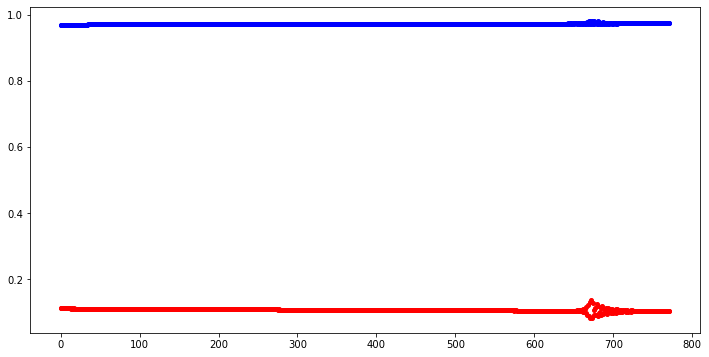

In [21]:
# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,6))
plt.plot(x_len, y_vloss, "o", c="red", markersize=4)
plt.plot(x_len, y_acc, "o", c="blue", markersize=4)

plt.show()

# Load_Digit 

### (다중분류)

In [40]:
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [41]:
from sklearn.datasets import load_digits

In [42]:
digits = load_digits()

In [43]:
# (1797, 64)로 이루어짐...
print(digits.data.shape)

(1797, 64)


In [44]:
data =digits.data
label =digits.target

In [45]:
print(data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [46]:
# 테스트값, 
X_train,X_test,y_train,y_test=train_test_split(data,label,test_size=0.2,
                                               shuffle=True,stratify=label ,random_state=2020)

In [47]:
len(X_train)

1437

In [48]:
len(X_test)

360

In [49]:
df =pd.DataFrame(data,label)
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
0,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
8,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
9,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [50]:
model = Sequential([
    Dense(150, input_dim=64, activation='selu', kernel_initializer='lecun_normal'),
    Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    Dense(50, activation='selu', kernel_initializer='lecun_normal'),
    Dense(10, activation='softmax')
])

In [51]:
earlystopping_cb = EarlyStopping(monitor='val_loss', patience=50)

In [54]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
             optimizer = keras.optimizers.Adam(lr=0.006),
             metrics=['accuracy'])

In [55]:
history = model.fit(X_train, y_train, epochs=3000, batch_size=25, validation_split=0.2, callbacks=[earlystopping_cb])

Train on 1149 samples, validate on 288 samples
Epoch 1/3000
1149/1149 [==============================] - 0s 330us/sample - loss: 1.2887 - accuracy: 0.7206 - val_loss: 0.2457 - val_accuracy: 0.9201
Epoch 2/3000
1149/1149 [==============================] - 0s 62us/sample - loss: 0.2042 - accuracy: 0.9330 - val_loss: 0.3214 - val_accuracy: 0.8889
Epoch 3/3000
1149/1149 [==============================] - 0s 62us/sample - loss: 0.1414 - accuracy: 0.9487 - val_loss: 0.1728 - val_accuracy: 0.9375
Epoch 4/3000
1149/1149 [==============================] - 0s 60us/sample - loss: 0.0702 - accuracy: 0.9765 - val_loss: 0.2232 - val_accuracy: 0.9479
Epoch 5/3000
1149/1149 [==============================] - 0s 60us/sample - loss: 0.0743 - accuracy: 0.9765 - val_loss: 0.1370 - val_accuracy: 0.9653
Epoch 6/3000
1149/1149 [==============================] - 0s 61us/sample - loss: 0.0864 - accuracy: 0.9721 - val_loss: 0.1980 - val_accuracy: 0.9514
Epoch 7/3000
1149/1149 [==============================] - 

1149/1149 [==============================] - 0s 59us/sample - loss: 2.5094e-05 - accuracy: 1.0000 - val_loss: 0.0678 - val_accuracy: 0.9896
Epoch 55/3000
1149/1149 [==============================] - 0s 59us/sample - loss: 2.3984e-05 - accuracy: 1.0000 - val_loss: 0.0679 - val_accuracy: 0.9896
Epoch 56/3000
1149/1149 [==============================] - 0s 55us/sample - loss: 2.2947e-05 - accuracy: 1.0000 - val_loss: 0.0680 - val_accuracy: 0.9896
Epoch 57/3000
1149/1149 [==============================] - 0s 60us/sample - loss: 2.1983e-05 - accuracy: 1.0000 - val_loss: 0.0682 - val_accuracy: 0.9896
Epoch 58/3000
1149/1149 [==============================] - 0s 60us/sample - loss: 2.1072e-05 - accuracy: 1.0000 - val_loss: 0.0682 - val_accuracy: 0.9896
Epoch 59/3000
1149/1149 [==============================] - 0s 58us/sample - loss: 2.0263e-05 - accuracy: 1.0000 - val_loss: 0.0684 - val_accuracy: 0.9896
Epoch 60/3000
1149/1149 [==============================] - 0s 59us/sample - loss: 1.9425e-

In [57]:
model.evaluate(X_test, y_test)[1]

360/360 [==============================] - 0s 33us/sample - loss: 0.1175 - accuracy: 0.9833


0.98333335

In [58]:
y_vloss =history.history['val_loss']
y_acc = history.history['accuracy']

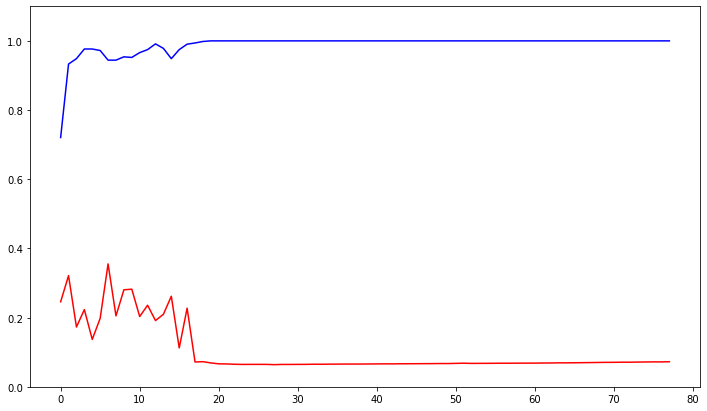

In [59]:
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12, 7))
plt.ylim(0.0, 1.1)
plt.plot(x_len, y_vloss, '-', color='red', markersize=2)
plt.plot(x_len, y_acc, '-', color='blue', markersize=2)
plt.show()
